In [89]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

import math
from mpl_toolkits import mplot3d
import autograd

def gradient_descent(initial_X,alpha,max_iterations,epsilon):
  input  = []
  output = []
  input.append(initial_X)
  output.append(func(initial_X))
  iter = 0
  alpha = alpha
  epsilon = epsilon
  while True:
    old_X = input[iter]
    new_X = old_X - alpha*gradient(old_X)
    # if abs(func(old_X)-func(new_X))<=epsilon or abs(np.all(old_X - new_X) <= epsilon) or np.all(gradient(old_X)==0) :
    if (LA.norm(old_X - new_X)<= epsilon) or np.all(gradient(old_X)==0) :
      break
    iter+=1
    if iter > max_iterations :
      break
    input.append(new_X)
    output.append(func(new_X))
  return input,output



#**Q1 :  f(x) = x1^2 + x2^2 + 5**

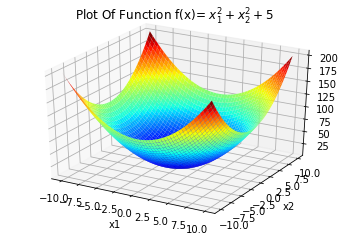

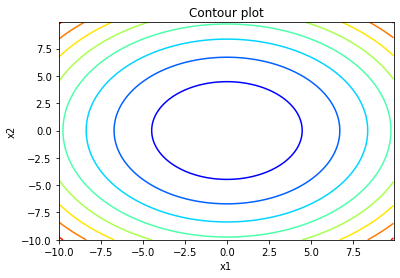

In [90]:
x1 = np.arange(-10,10,0.1)
x2 = np.arange(-10,10,0.1)
x1,x2 = np.meshgrid(x1,x2)
f = x1**2 + x2**2 + 5

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Plot Of Function f(x)= $x_1^2 + x_2^2 + 5 $')
surf=ax.plot_surface(x1,x2,f,cmap='jet')
plt.show()

fig = plt.figure()
ax = plt.axes()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Contour plot')
surf=ax.contour(x1,x2,f,cmap='jet')
plt.show()

#### As color of plot changes acc. to VIBGYOR value of function increases
#### From Contour plot we can say that minimum value can be at (x1,x2)=(0,0)

In [91]:
def func(X):
    return X[0]**2 + X[1]**2 + 5;

def gradient(X):
    Y = np.array([2*X[0],2*X[1]])
    return Y;

initial_X = np.array([3.0,4.0])
Hessian = autograd.jacobian(autograd.elementwise_grad(func))
# print("Hessian Matrix : ")
# print(Hessian(initial_X))

eigvals , eigvecs = LA.eig(Hessian(initial_X))
if (min(eigvals)>=0):   ## if np.all(eigvals>=0):
  print("Function is Convex since all eigen values are >=0")
else:
  print("Function is Non-Convex since all eigen values are not >=0")


Function is Convex since all eigen values are >=0


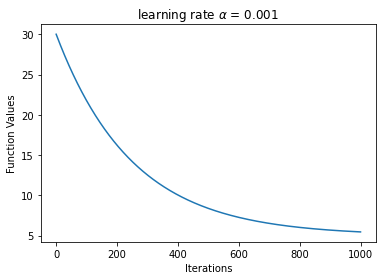

Min Value of function :  5.456060630593768
Min value occurs at :  [0.40519357 0.54025809]
Total Iterations :  1000


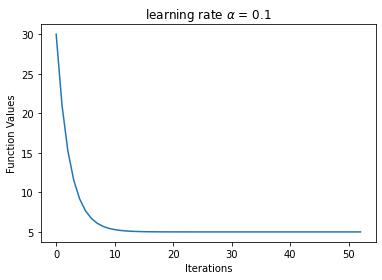

Min Value of function :  5.000000002085925
Min value occurs at :  [2.74031557e-05 3.65375409e-05]
Total Iterations :  52


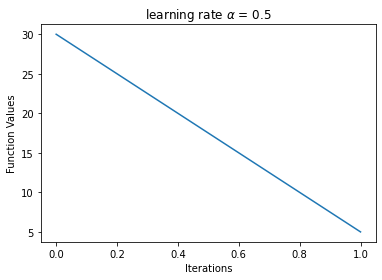

Min Value of function :  5.0
Min value occurs at :  [0. 0.]
Total Iterations :  1


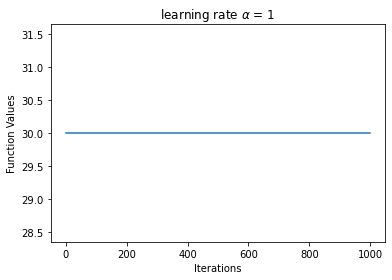

Min Value of function :  30
Min value occurs at :  [3 4]
Total Iterations :  1000
For alpha = 1, osciallations happens between (3,4) & (-3,-4)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in long_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in long_scalars
  """


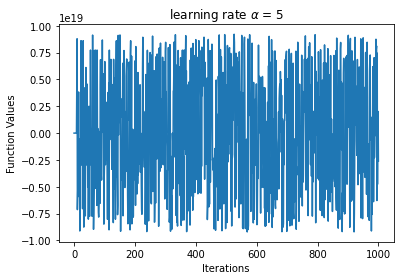

Min Value of function :  -2606775249549496162
Min value occurs at :  [ 1278644150515887811 -4444055823882000124]
Total Iterations :  1000
For alpha = 5, function value does not converges


In [92]:
learning_rates = np.array([0.001,0.1,0.5]) 

initial_X = np.array([3,4])
max_iterations = 1000
epsilon = 0.00001

for alpha in learning_rates:
  input , output = gradient_descent(initial_X,alpha,max_iterations,epsilon)
  iterations = np.arange(0,len(output))
  plt.plot(iterations,output)
  plt.xlabel('Iterations')
  plt.ylabel('Function Values')
  plt.title(r'learning rate $\alpha$ = {}'.format(alpha))
  plt.show()
  print('Min Value of function : ',output[-1])
  print('Min value occurs at : ',input[-1])
  print('Total Iterations : ',len(output)-1)
  input.clear()
  output.clear()



alpha = 1

input , output = gradient_descent(initial_X,alpha,max_iterations,epsilon)
iterations = np.arange(0,len(output))
plt.plot(iterations,output)
plt.xlabel('Iterations')
plt.ylabel('Function Values')
plt.title(r'learning rate $\alpha$ = {}'.format(alpha))
plt.show()
print('Min Value of function : ',output[-1])
print('Min value occurs at : ',input[-1])
print('Total Iterations : ',len(output)-1)
print('For alpha = 1, osciallations happens between (3,4) & (-3,-4)')

alpha = 5
input , output = gradient_descent(initial_X,alpha,max_iterations,epsilon)
iterations = np.arange(0,len(output))
plt.plot(iterations,output)
plt.xlabel('Iterations')
plt.ylabel('Function Values')
plt.title(r'learning rate $\alpha$ = {}'.format(alpha))
plt.show()
print('Min Value of function : ',output[-1])
print('Min value occurs at : ',input[-1])
print('Total Iterations : ',len(output)-1)
print('For alpha = 5, function value does not converges')

#**Q2 : f(x)= x1^2 + x2^2  - 6x1 + 8x2 + 9**

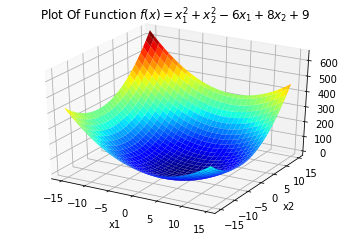

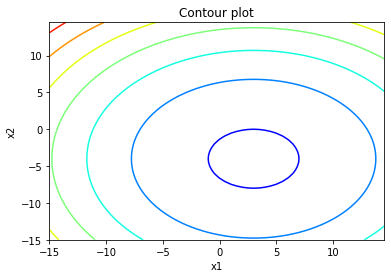

In [93]:
x1 = np.arange(-15,15,0.5)
x2 = np.arange(-15,15,0.5)
x1,x2 = np.meshgrid(x1,x2)
f = x1**2 + x2**2 -6*x1 + 8*x2 + 9 

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Plot Of Function $ f(x) = x_1^2 + x_2^2 -6x_1 + 8x_2 + 9$')
surf=ax.plot_surface(x1,x2,f,cmap='jet')
plt.show()

fig = plt.figure()
ax = plt.axes()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Contour plot')
surf=ax.contour(x1,x2,f,cmap='jet')
plt.show()


#### As color of plot changes acc. to VIBGYOR value of function increases
#### From Contour plot we can say that minimum value can occur at x1 between (0 to 5) and x2 between (-5 to 0)

In [94]:
def func(X):
    return X[0]**2 + X[1]**2 - 6*X[0] + 8*X[1] + 9;

def gradient(X):
    Y = np.array([2*X[0]-6 , 2*X[1]+8 ])
    return Y;

initial_X = np.array([3.0,-3.0])
Hessian = autograd.jacobian(autograd.elementwise_grad(func))
#print("Hessian Matrix : ")
#print(Hessian(initial_X))

eigvals , eigvecs = LA.eig(Hessian(initial_X))
if (min(eigvals)>=0):   ## if np.all(eigvals>=0):
  print("Function is Convex since all eigen values are >=0")
else:
  print("Function is Non-Convex since all eigen values are not >=0")

Function is Convex since all eigen values are >=0


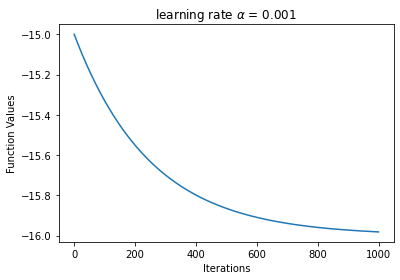

Min Value of function :  -15.98175757477625
Min value occurs at :  [ 3.         -3.86493548]
Total Iterations :  1000


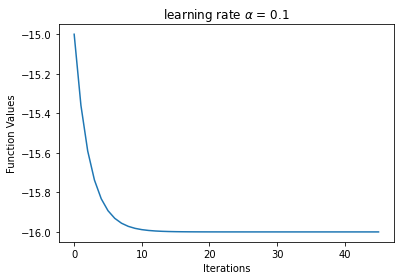

Min Value of function :  -15.999999998102862
Min value occurs at :  [ 3.         -3.99995644]
Total Iterations :  45


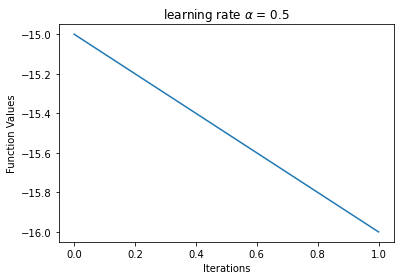

Min Value of function :  -16.0
Min value occurs at :  [ 3. -4.]
Total Iterations :  1


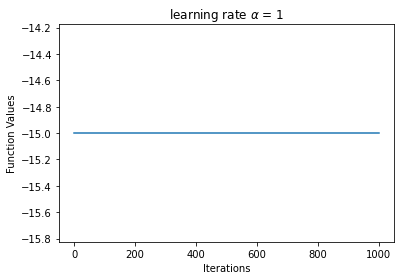

Min Value of function :  -15
Min value occurs at :  [ 3 -3]
Total Iterations :  1000
For alpha = 1, function input oscillates between (x1,x2) = (3,-3) and (3,-5)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in long_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in long_scalars
  """


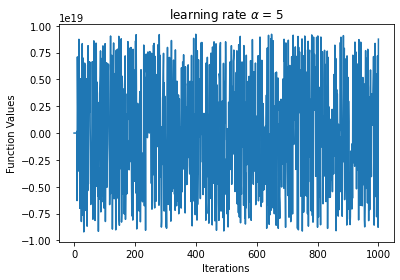

Min Value of function :  8750166145398604913
Min value occurs at :  [                   3 -5722699974397887939]
Total Iterations :  1000
For alpha = 5, function value does not converges


In [95]:
def func(X):
    return X[0]**2 + X[1]**2 - 6*X[0] + 8*X[1] + 9;

def gradient(X):
    Y = np.array([2*X[0]-6 , 2*X[1]+8 ])
    return Y;

learning_rates = np.array([0.001,0.1,0.5]) 

initial_X = np.array([3,-3])
max_iterations = 1000
epsilon = 0.00001

for alpha in learning_rates:
  input , output = gradient_descent(initial_X,alpha,max_iterations,epsilon)
  iterations = np.arange(0,len(output))
  plt.plot(iterations,output)
  plt.xlabel('Iterations')
  plt.ylabel('Function Values')
  plt.title(r'learning rate $\alpha$ = {}'.format(alpha))
  plt.show()
  print('Min Value of function : ',output[-1])
  print('Min value occurs at : ',input[-1])
  print('Total Iterations : ',len(output)-1)

## learning rate alpha = 1
alpha = 1
initial_X = np.array([3,-3])
input , output = gradient_descent(initial_X,alpha,max_iterations,epsilon)
iterations = np.arange(0,len(output))
plt.plot(iterations,output)
plt.xlabel('Iterations')
plt.ylabel('Function Values')
plt.title(r'learning rate $\alpha$ = {}'.format(alpha))
plt.show()
print('Min Value of function : ',output[-1])
print('Min value occurs at : ',input[-1])
print('Total Iterations : ',len(output)-1)
print('For alpha = 1, function input oscillates between (x1,x2) = (3,-3) and (3,-5)')

## learning rate alpha = 5
alpha = 5
input , output = gradient_descent(initial_X,alpha,max_iterations,epsilon)
iterations = np.arange(0,len(output))
plt.plot(iterations,output)
plt.xlabel('Iterations')
plt.ylabel('Function Values')
plt.title(r'learning rate $\alpha$ = {}'.format(alpha))
plt.show()
print('Min Value of function : ',output[-1])
print('Min value occurs at : ',input[-1])
print('Total Iterations : ',len(output)-1)
print('For alpha = 5, function value does not converges')

#**Q3 : f(x)= 3x1^2 - 5x2^2**

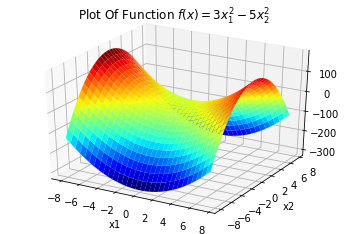

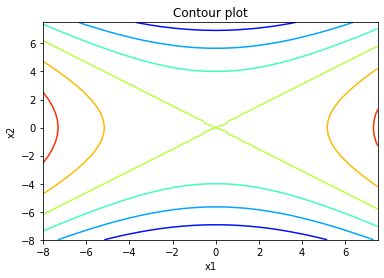

In [96]:
x1 = np.arange(-8,8,0.5)
x2 = np.arange(-8,8,0.5)
x1,x2 = np.meshgrid(x1,x2)
f = 3*x1**2 - 5*x2**2  

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Plot Of Function $f(x) = 3x_1^2 - 5x_2^2$')
surf=ax.plot_surface(x1,x2,f,cmap='jet')
plt.show()

fig = plt.figure()
ax = plt.axes()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Contour plot')
surf=ax.contour(x1,x2,f,cmap='jet')
plt.show()

In [97]:
def func(X):
    return 3*X[0]**2 - 5*X[1]**2 ;

def gradient(X):
    Y = np.array([6*X[0] , -10*X[1]])
    return Y;

initial_X = np.array([0.5,0.5])
Hessian = autograd.jacobian(autograd.elementwise_grad(func))
#print("Hessian Matrix : ")
#print(Hessian(initial_X))

eigvals , eigvecs = LA.eig(Hessian(initial_X))
if (min(eigvals)>=0):   ## if np.all(eigvals>=0):
  print("Function is Convex since all eigen values are >=0")
else:
  print("Function is Non-Convex since all eigen values are not >=0")

Function is Non-Convex since all eigen values are not >=0


### **There does not exists any minimum value this can be observed from plot of function and contour.**

### **It can be proved from the Hessian matrix. Since all eigen values are not >=0, there does not exists minimum value.**

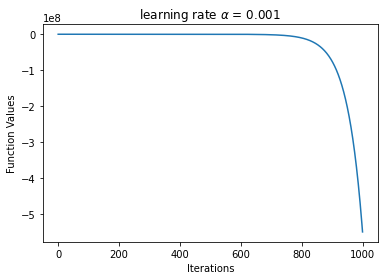

Min Value of function :  -549107756.3126142
Min value occurs at :  [1.21717886e-03 1.04795778e+04]
Total Iterations :  1000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  


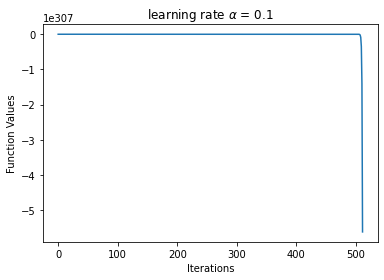

Min Value of function :  -inf
Min value occurs at :  [0.00000000e+000 5.35754304e+300]
Total Iterations :  1000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:2450: RuntimeWarning: overflow encountered in double_scalars
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


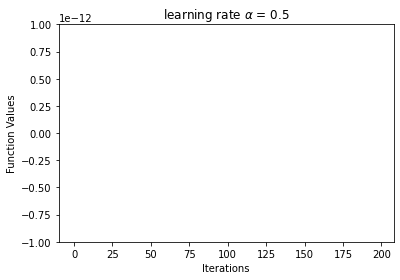

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in subtract


Min Value of function :  nan
Min value occurs at :  [5.35754304e+300             inf]
Total Iterations :  1000


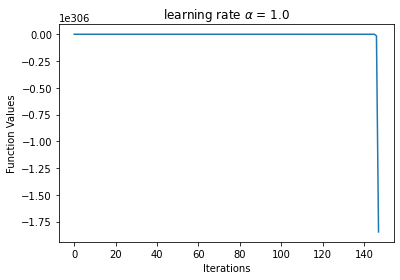

Min Value of function :  nan
Min value occurs at :  [nan inf]
Total Iterations :  1000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in subtract


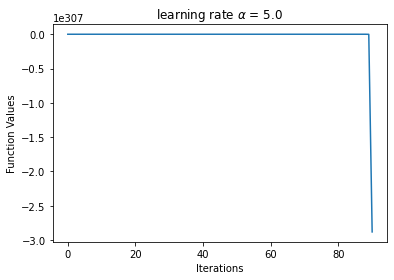

Min Value of function :  nan
Min value occurs at :  [nan inf]
Total Iterations :  1000


In [98]:
def func(X):
    return 3*X[0]**2 - 5*X[1]**2 ;

def gradient(X):
    Y = np.array([6*X[0], -10*X[1]])
    return Y;

learning_rates = np.array([0.001,0.1,0.5,1,5]) 
initial_X = np.array([0.5,0.5])
max_iterations = 1000
epsilon = 0.00001

for alpha in learning_rates:
  input , output = gradient_descent(initial_X,alpha,max_iterations,epsilon)
  iterations = np.arange(0,len(output))
  plt.plot(iterations,output)
  plt.xlabel('Iterations')
  plt.ylabel('Function Values')
  plt.title(r'learning rate $\alpha$ = {}'.format(alpha))
  plt.show()
  print('Min Value of function : ',output[-1])
  print('Min value occurs at : ',input[-1])
  print('Total Iterations : ',len(output)-1)

###**As seen above non of the above graph converges and we get minimum value at -infinite, it shows our result matches with result obtained from Hessian eigen values.**

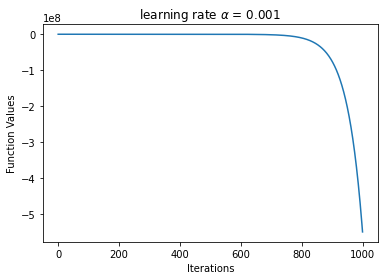

Min Value of function :  -549107756.3126142
Min value occurs at :  [-1.21717886e-03 -1.04795778e+04]
Total Iterations :  1000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  


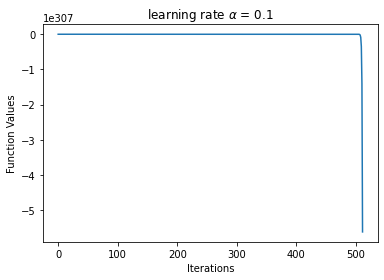

Min Value of function :  -inf
Min value occurs at :  [ 0.00000000e+000 -5.35754304e+300]
Total Iterations :  1000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:2450: RuntimeWarning: overflow encountered in double_scalars
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


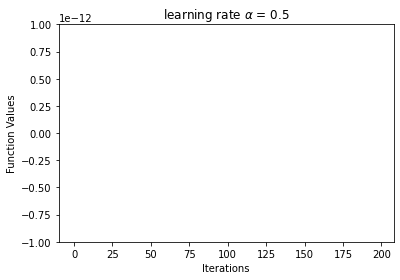

Min Value of function :  nan
Min value occurs at :  [-5.35754304e+300             -inf]
Total Iterations :  1000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in subtract


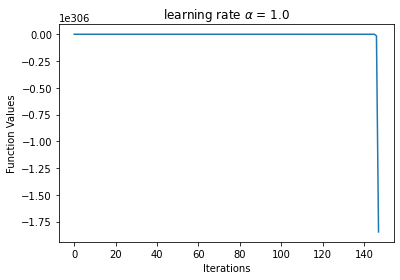

Min Value of function :  nan
Min value occurs at :  [ nan -inf]
Total Iterations :  1000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in subtract


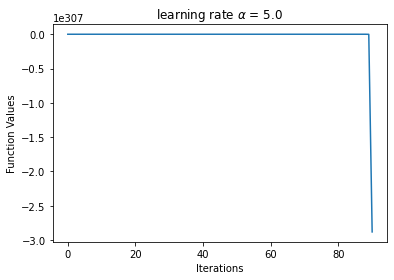

Min Value of function :  nan
Min value occurs at :  [ nan -inf]
Total Iterations :  1000


In [99]:
def func(X):
    return 3*X[0]**2 - 5*X[1]**2 ;

def gradient(X):
    Y = np.array([6*X[0] , -10*X[1]])
    return Y;


initial_X = np.array([-0.5,-0.5])
max_iterations = 1000
epsilon = 0.00001
learning_rates = np.array([0.001,0.1,0.5,1,5]) 

for alpha in learning_rates:
  input , output = gradient_descent(initial_X,alpha,max_iterations,epsilon)
  iterations = np.arange(0,len(output))
  plt.plot(iterations,output)
  plt.xlabel('Iterations')
  plt.ylabel('Function Values')
  plt.title(r'learning rate $\alpha$ = {}'.format(alpha))
  plt.show()
  print('Min Value of function : ',output[-1])
  print('Min value occurs at : ',input[-1])
  print('Total Iterations : ',len(output)-1)

### **On changing the input by changing its sign i.e. -0.5,-0.5 , we observe that, we still get the same minimum value but the input value at which minimum occurs also changes its sign**

#**Q4 : f(x)= 3x1^2 - 5e^(x2^2)**

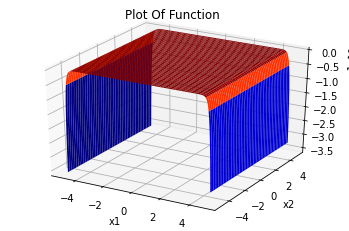

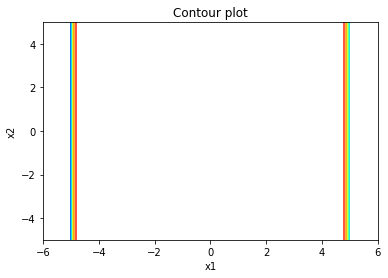

In [100]:
x1 = np.arange(-5,5,0.01)
x2 = np.arange(-5,5,0.01)
y = np.power(math.e,x2**2)
x1,x2 = np.meshgrid(x1,x2)
f = 3*x1**2 - 5*y

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Plot Of Function ')
surf=ax.plot_surface(x1,x2,f,cmap='jet')
plt.show()

fig = plt.figure()
ax = plt.axes()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_xlim(-6,6)
ax.set_title('Contour plot')
surf=ax.contour(x1,x2,f,cmap='jet')
plt.show()

In [101]:
def func(X):
    return 3*X[0]**2 - 5*pow(math.e,X[1]**2);

def gradient(X):
    Y = np.array([6*X[0] , -10*pow(math.e,X[1]**2)*X[1] ])
    return Y;

initial_X = np.array([-1.0,-1.0])
Hessian = autograd.jacobian(autograd.elementwise_grad(func))
#print("Hessian Matrix : ")
#print(Hessian(initial_X))

eigvals , eigvecs = LA.eig(Hessian(initial_X))
if (min(eigvals)>=0):   ## if np.all(eigvals>=0):
  print("Function is Convex since all eigen values are >=0")
else:
  print("Function is Non-Convex since all eigen values are not >=0")

Function is Non-Convex since all eigen values are not >=0


###**From contour and plot of function we can say there does not exists minimum value of function.**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in subtract


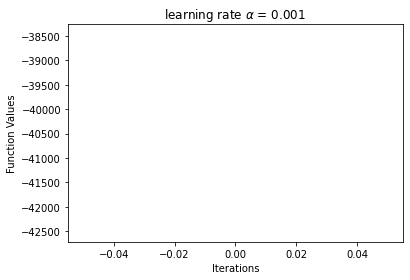

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in subtract


Min Value of function :  -inf
Min value occurs at :  [-0.00730307        -inf]
Total Iterations :  1000


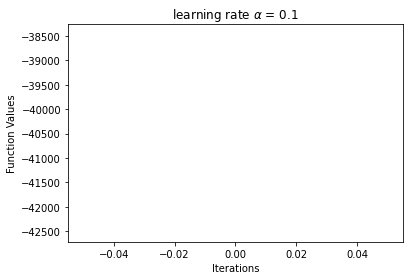

Min Value of function :  -inf
Min value occurs at :  [  0. -inf]
Total Iterations :  1000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


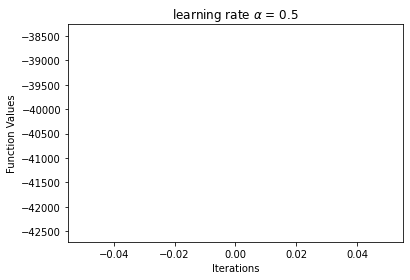

Min Value of function :  nan
Min value occurs at :  [-3.21452582e+301             -inf]
Total Iterations :  1000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in subtract


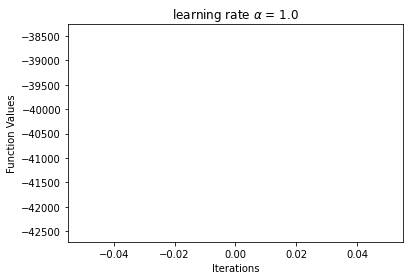

Min Value of function :  nan
Min value occurs at :  [ nan -inf]
Total Iterations :  1000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in subtract


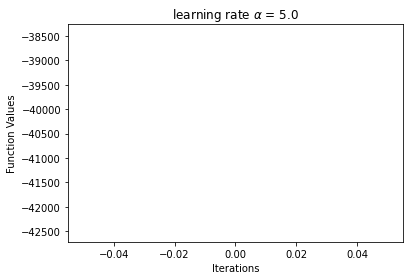

Min Value of function :  nan
Min value occurs at :  [ nan -inf]
Total Iterations :  1000


In [102]:
def func(X):
    return 3*X[0]**2 - 5*pow(math.e,X[1]**2);

def gradient(X):
    Y = np.array([6*X[0] , -10*pow(math.e,X[1]**2)*X[1] ])
    return Y;

initial_X = np.array([-3,-3])
max_iterations = 1000
epsilon = 0.00001

learning_rates = np.array([0.001,0.1,0.5,1,5]) 

for alpha in learning_rates:
  input , output = gradient_descent(initial_X,alpha,max_iterations,epsilon)
  iterations = np.arange(0,len(output))
  plt.plot(iterations,output)
  plt.xlabel('Iterations')
  plt.ylabel('Function Values')
  plt.title(r'learning rate $\alpha$ = {}'.format(alpha))
  plt.show()
  print('Min Value of function : ',output[-1])
  print('Min value occurs at : ',input[-1])
  print('Total Iterations : ',len(output)-1)

##**Since analysis shows that function is Non-convex it must not have minimum value. As in seen above we get -infinite as the minimum value.** 